In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
import gzip, pickle, pickletools
import plotly.express as px
import cufflinks as cf
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
#to make everything locally
cf.go_offline()

In [2]:
data = pd.read_csv("D:\data science\ineuron\Project\Business Analytics\Data_given\gpsfinal.csv")
data.head()

,Rating,Reviews,Size_New,Installs_New,Price_New,Category_new,Content_Rating_new
0,4.1,97,19.0,10000,0,0,1
1,3.9,57,14.0,500000,0,0,1
2,4.7,42,8.7,5000000,0,0,1
3,4.5,92,25.0,50000000,0,0,4
4,4.3,57,2.8,100000,0,0,1


In [3]:
px.box(data, y = 'Size_New')

In [4]:
data = data[data['Size_New']<=67]

In [5]:
px.box(data, y = 'Installs_New')

In [6]:
data = data[data['Installs_New']<=1000000]

In [7]:
### Model Training#####
X = data.drop(columns = ['Rating'])
Y = data['Rating']>4.2
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=.15 , random_state=45)



# # Scale the data to be between -1 and 1
# scaler = StandardScaler()
# scaler.fit(train_X)
# train_X = scaler.transform(train_X)
# test_X = scaler.transform(test_X)


In [25]:
dt = DecisionTreeClassifier()
dt.fit(train_X,train_y)
y_pred = dt.predict(test_X)

# Create a confusion matrix
cnf_matrix = confusion_matrix(test_y, y_pred)
print(recall_score(test_y,y_pred))
print(precision_score(test_y,y_pred))
cnf_matrix


0.5811138014527845
0.54421768707483


array([[453, 201],
       [173, 240]], dtype=int64)

([<matplotlib.axis.YTick at 0x2318333a648>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

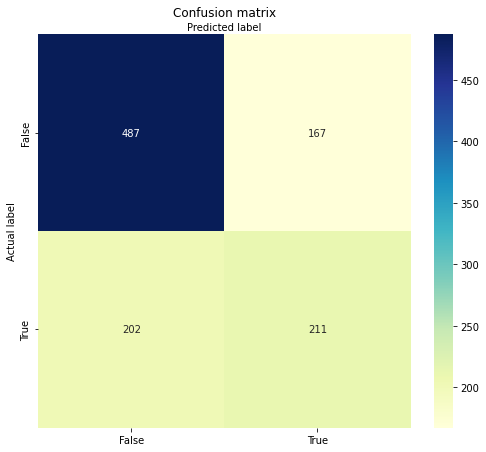

In [8]:
rfr = RandomForestClassifier()
rfr.fit(train_X,train_y)
y_pred = rfr.predict(test_X)

# Create a confusion matrix
cnf_matrix = confusion_matrix(test_y, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

In [9]:
param_grid = {'n_estimators':[500,800,1000,1500],
              'min_samples_leaf':[2,3],
              'max_depth': [2, 8, 16],
              'ccp_alpha' : np.linspace(0,.01,10)
             }
rfr = RandomForestClassifier(oob_score =True, n_jobs=5)
rfr_grid = GridSearchCV(rfr, cv = 3, param_grid=param_grid, verbose=True)
rfr_grid.fit(train_X,train_y)
rfr_grid.best_estimator_

Fitting 3 folds for each of 240 candidates, totalling 720 fits


d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



RandomForestClassifier(max_depth=16, min_samples_leaf=2, n_estimators=1500,
                       n_jobs=5, oob_score=True)

In [42]:
alpha_impurity = dt.cost_complexity_pruning_path(train_X,train_y)
recall = {}
for alpha in alpha_impurity['ccp_alphas']:
    rfr = RandomForestClassifier(max_depth=16, min_samples_leaf=2, n_estimators=1500,
                       n_jobs=5, oob_score=True, ccp_alpha= alpha)
    rfr.fit(train_X,train_y)
    y_pred = rfr.predict(test_X)
    recall[alpha]=recall_score(test_y,y_pred)

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClas

In [43]:
recall

{0.0: 0.46973365617433416,
 1.103022281050077e-05: 0.46731234866828086,
 1.5757461157858243e-05: 0.4648910411622276,
 2.7575557026251953e-05: 0.4552058111380145,
 2.7807284396220414e-05: 0.4576271186440678,
 4.1363335539377916e-05: 0.46973365617433416,
 4.259948119917506e-05: 0.46731234866828086,
 4.4120891242003054e-05: 0.46246973365617433,
 4.48102801676594e-05: 0.46731234866828086,
 4.595926171041987e-05: 0.46246973365617433,
 5.239355834987857e-05: 0.4648910411622276,
 5.3903351291134964e-05: 0.4576271186440678,
 5.515111405250385e-05: 0.45278450363196127,
 5.515111405250388e-05: 0.4648910411622276,
 6.302984463143305e-05: 0.46246973365617433,
 6.434296639458782e-05: 0.4600484261501211,
 6.565608815774248e-05: 0.4576271186440678,
 6.676187490566257e-05: 0.4648910411622276,
 6.768545815534565e-05: 0.4648910411622276,
 6.893889256562983e-05: 0.46246973365617433,
 6.920370265231079e-05: 0.4552058111380145,
 7.090857521036214e-05: 0.45278450363196127,
 7.131609575754804e-05: 0.46731234

d:\apps\anaconda\envs\ba\lib\site-packages\sklearn\base.py:442: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



([<matplotlib.axis.YTick at 0x2319ad1d2c8>,
 [Text(0, 0.5, 'False'), Text(0, 1.5, 'True')])

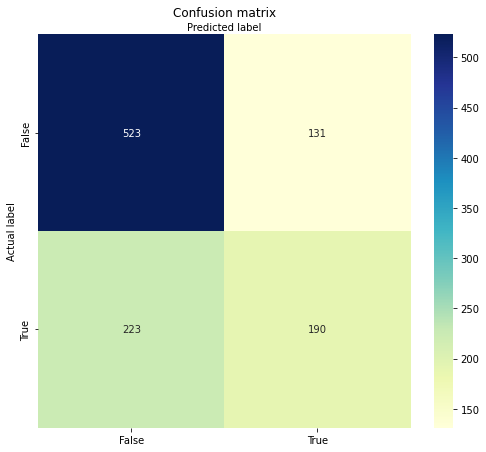

In [44]:
rfr = RandomForestClassifier(ccp_alpha=0.00011555471515762705,max_depth=16, min_samples_leaf=2, n_estimators=1500,
                       n_jobs=5, oob_score=True)
rfr.fit(train_X,train_y)
y_pred = rfr.predict(test_X)

# Create a confusion matrix
cnf_matrix = confusion_matrix(test_y, y_pred)

# Create heatmap from the confusion matrix
%matplotlib inline
class_names=[False, True] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

array([0.        , 0.00111111, 0.00222222, 0.00333333, 0.00444444,
       0.00555556, 0.00666667, 0.00777778, 0.00888889, 0.01      ])

In [ ]:
bbbbbb

In [ ]:
# filepath = "random_forest.pkl"
# with gzip.open(filepath, "wb") as f:
#     pickled = pickle.dumps(rfr_grid)
#     optimized_pickle = pickletools.optimize(pickled)
#     f.write(optimized_pickle)